In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
import cv2
from glob import glob
import random
from numpy.random import seed
seed(1)

ASL Alphabet for letter: S


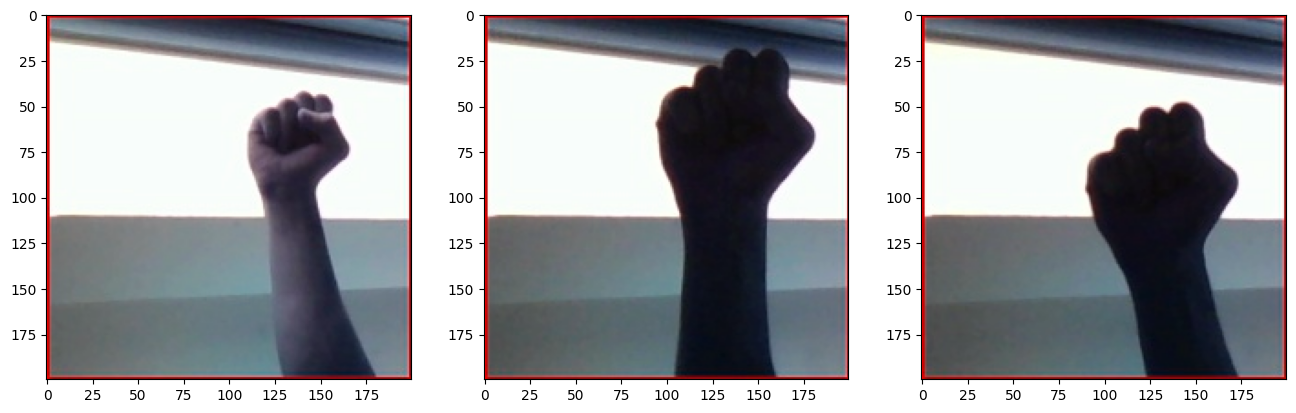

In [2]:
def plot_three_samples(letter):
    print("ASL Alphabet for letter: "+letter)
    base_path = '../asl_alphabet_train/asl_alphabet_train/'
    img_path = base_path + letter + '/**'
    path_contents = glob(img_path)
    
    plt.figure(figsize=(16,16))
    imgs = random.sample(path_contents,3)
    plt.subplot(1,3,1)
    plt.imshow(cv2.imread(imgs[0]))
    plt.subplot(1,3,2)
    plt.imshow(cv2.imread(imgs[1]))
    plt.subplot(1,3,3)
    plt.imshow(cv2.imread(imgs[2]))
    
    return

plot_three_samples('S')

In [3]:
path = '../asl_alphabet_train/asl_alphabet_train'
path_test = '../asl_alphabet_test/asl_alphabet_test'
target_size = (64,64)
target_dims = (64,64,3)
val_frac = 0.1
n_classes = 29
batch_size = 64

image_generator = ImageDataGenerator(samplewise_center = True, samplewise_std_normalization = True, validation_split=val_frac)

train_gen = image_generator.flow_from_directory(path, target_size=target_size, batch_size=batch_size, shuffle=True, subset='training')
val_gen = image_generator.flow_from_directory(path, target_size=target_size, subset='validation')

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [4]:
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
MOBILENET = tf.keras.Sequential()
MOBILENET.add(tf.keras.applications.mobilenet.MobileNet(weights='imagenet', include_top=False, input_shape=(64, 64, 3)))
MOBILENET.add(Flatten())
MOBILENET.add(Dense(256, activation='relu'))
MOBILENET.add(Dense(29, activation='softmax'))

MOBILENET.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'] )
MOBILENET.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 2, 2, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 256)               1048832   
                                                                 
 dense_1 (Dense)             (None, 29)                7453      
                                                                 
Total params: 4,285,149
Trainable params: 4,263,261
Non-trainable params: 21,888
_________________________________________________________________


In [5]:
mobilenet_model = MOBILENET.fit(train_gen, epochs=20, validation_data=val_gen)

Epoch 1/20
1224/1224 [==============================] - 127s 97ms/step - loss: 0.9925 - accuracy: 0.7112 - val_loss: 3.4196 - val_accuracy: 0.0345
Epoch 2/20
1224/1224 [==============================] - 77s 63ms/step - loss: 1.0014 - accuracy: 0.6695 - val_loss: 1.4073 - val_accuracy: 0.6590
Epoch 3/20
1224/1224 [==============================] - 74s 60ms/step - loss: 0.5868 - accuracy: 0.8141 - val_loss: 0.6735 - val_accuracy: 0.8230
Epoch 4/20
1224/1224 [==============================] - 74s 60ms/step - loss: 0.3351 - accuracy: 0.8906 - val_loss: 0.9099 - val_accuracy: 0.7625
Epoch 5/20
1224/1224 [==============================] - 74s 60ms/step - loss: 0.3515 - accuracy: 0.8869 - val_loss: 1.5128 - val_accuracy: 0.6884
Epoch 6/20
1224/1224 [==============================] - 74s 60ms/step - loss: 0.3083 - accuracy: 0.9019 - val_loss: 0.9016 - val_accuracy: 0.7562
Epoch 7/20
1224/1224 [==============================] - 75s 61ms/step - loss: 0.4179 - accuracy: 0.8699 - val_loss: 0.9819 

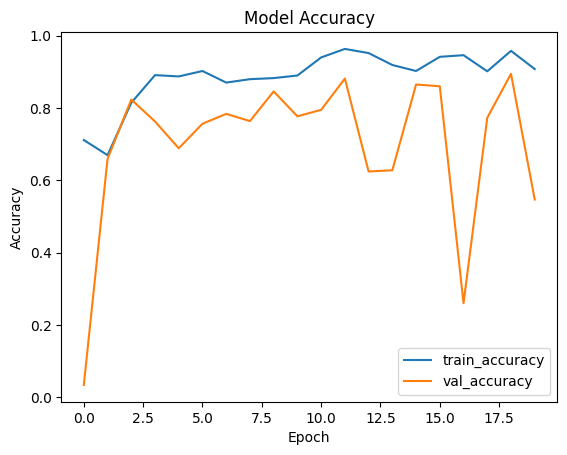

In [6]:
plt.plot(mobilenet_model.history['accuracy'])
plt.plot(mobilenet_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy','val_accuracy'], loc = 'lower right')
plt.show()